In [9]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt

In [2]:
Nino34 = pd.read_csv("nino34.long.anom.csv", header=0, names=["Date", "Nino34"])
print(Nino34)

            Date   Nino34
0     1870-01-01    -1.00
1     1870-02-01    -1.20
2     1870-03-01    -0.83
3     1870-04-01    -0.81
4     1870-05-01    -1.27
...          ...      ...
1855  2024-08-01     0.02
1856  2024-09-01 -9999.00
1857  2024-10-01 -9999.00
1858  2024-11-01 -9999.00
1859  2024-12-01 -9999.00

[1860 rows x 2 columns]


In [4]:
Nino34_120yrs = Nino34[(Nino34["Date"] >= "1901-01-01") & (Nino34["Date"] <= "2020-12-31")]
print(Nino34_120yrs)

Nino34_fft = fft(Nino34_120yrs["Nino34"].values) 

            Date  Nino34
372   1901-01-01    0.82
373   1901-02-01    0.29
374   1901-03-01    0.05
375   1901-04-01   -0.13
376   1901-05-01   -0.19
...          ...     ...
1807  2020-08-01   -0.42
1808  2020-09-01   -0.66
1809  2020-10-01   -1.19
1810  2020-11-01   -1.01
1811  2020-12-01   -0.98

[1440 rows x 2 columns]


In [5]:
Nino34_power = np.real(Nino34_fft*np.conjugate(Nino34_fft)) # Call the function np.real to remove negligible imaginary parts due to round-off error. Alternatively, write np.abs(Nino34_fft)**2.

In [6]:
Nino34_freq = fftfreq(len(Nino34_power), 1/12) # 1 month = 1/12 yrs
Nino34_period = 1/Nino34_freq

C:\Users\ben19\AppData\Local\Temp\ipykernel_25972\3492565973.py:2: RuntimeWarning: divide by zero encountered in divide
  Nino34_period = 1/Nino34_freq


C:\Users\ben19\AppData\Local\Temp\ipykernel_25972\984230154.py:2: RuntimeWarning: divide by zero encountered in divide
  return(1/x)


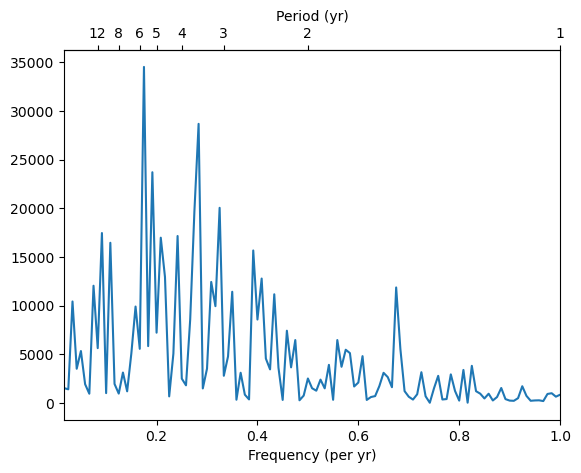

In [8]:
def reciprocal(x): # Function to transform between frequency and period for the secondary axis.
    return(1/x)

plt.plot(Nino34_freq[:len(Nino34_power)//2], Nino34_power[:len(Nino34_power)//2])
plt.xlabel("Frequency (per yr)")
period_ax = plt.gca().secondary_xaxis('top', functions=(reciprocal, reciprocal))
plt.xlim([1/60,1])
period_ax.set_ticks([1,2,3,4,5,6,8,12])
period_ax.set_xlabel("Period (yr)")
plt.savefig("NinoFFT", dpi=300, bbox_inches="tight")

In [10]:
Nino34_fft_ENSO = np.copy(Nino34_fft)
Nino34_fft_ENSO[~((2.5 <= np.abs(Nino34_period)) & (np.abs(Nino34_period) <= 7))] = 0
Nino34_ENSO = np.real(ifft(Nino34_fft_ENSO))

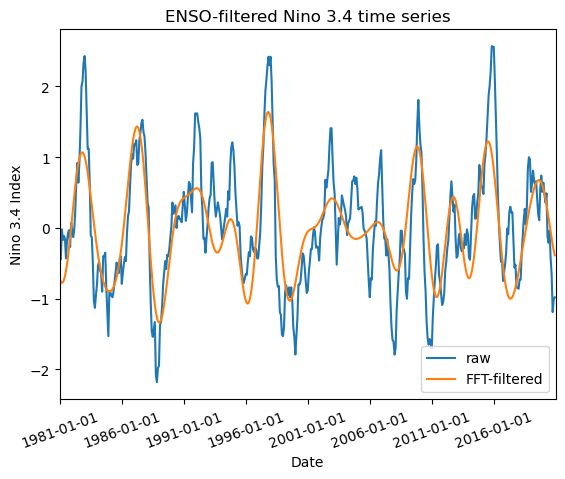

In [11]:
plt.plot(Nino34_120yrs["Date"], Nino34_120yrs["Nino34"].values, label="raw")
plt.plot(Nino34_120yrs["Date"], Nino34_ENSO, label="FFT-filtered")
plt.xticks(np.arange(0,len(Nino34_120yrs["Date"]), 60), rotation=20)
plt.xlim(["1981-01-01", "2020-12-31"])
plt.xlabel("Date")
plt.ylabel("Nino 3.4 Index")
plt.legend()
plt.title("ENSO-filtered Nino 3.4 time series")
plt.savefig("NinoENSOFilter", dpi=300, bbox_inches="tight")